In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os
import numpy as np

## Loading Data

In [19]:
labels = ['Negative', 'Positive']
imgSize = 120

In [178]:
def loadImages(data_dir):
    images = []
    for label in labels:
        path = os.path.join(data_dir, label)
        index = labels.index(label)
        for image in os.listdir(path):
            try:
                imgArr = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                resizedImg = cv2.resize(imgArr, (imgSize, imgSize))
                images.append([resizedImg, index])
            except Exception as e:
                print(e)
    return np.array(images)

In [179]:
df = loadImages('C:\\Users\\shvmt\Documents\\GitHub\\eduTech-Hackathon\\train')

C:\Users\shvmt\AppData\Local\Temp/ipykernel_26356/2315256588.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images)


In [180]:
df_test = loadImages('C:\\Users\\shvmt\Documents\\GitHub\\eduTech-Hackathon\\test')

C:\Users\shvmt\AppData\Local\Temp/ipykernel_26356/2315256588.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images)


In [181]:
df_val = loadImages('C:\\Users\\shvmt\Documents\\GitHub\\eduTech-Hackathon\\valid')

C:\Users\shvmt\AppData\Local\Temp/ipykernel_26356/2315256588.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images)


## EDA

In [135]:
len(df), len(df_test), len(df_val)

(600, 200, 200)

In [136]:
def countPlot(df):
    count = []
    for i in df:
        if i[1] == 0:
            count.append('P')
        elif i[1] == 1:
            count.append('N')
    sns.countplot(x=count)

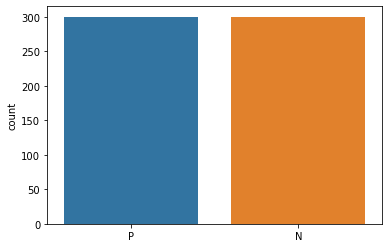

In [137]:
countPlot(df)

Balanced Dataset

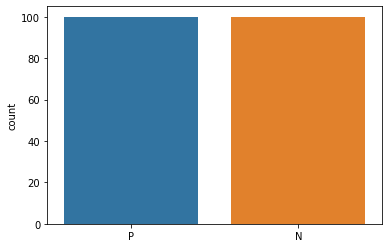

In [138]:
countPlot(df_test)

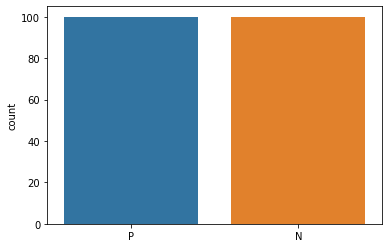

In [49]:
countPlot(df_val)

## Normalization

In [139]:
X = []
y = []

for image, label in df:
    X.append(image)
    y.append(label)
    

In [140]:
X_test = []
y_test = []

for image, label in df_test:
    X_test.append(image)
    y_test.append(label)

In [141]:
X_val = []
y_val = []

for image, label in df_val:
    X_val.append(image)
    y_val.append(label)

In [102]:
X = np.array(X).reshape(-1, imgSize, imgSize, 3)
X = X/255
y = np.array(y)

In [103]:
X_test = np.array(X_test).reshape(-1, imgSize, imgSize, 3)
X_test = X_test/255
y_test = np.array(y_test)

In [104]:
X_val = np.array(X_val).reshape(-1, imgSize, imgSize, 3)
X_val = X_val/255
y_val = np.array(y_val)

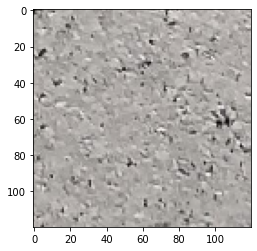

In [146]:
plt.imshow(X[0])

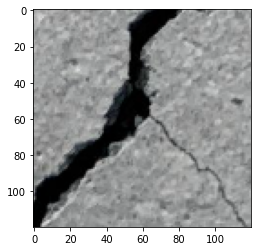

In [147]:
plt.imshow(X[301])

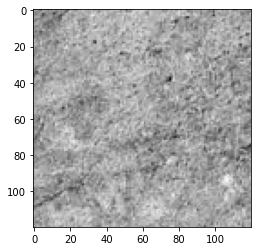

In [105]:
plt.imshow(X_test[0], cmap='gray')

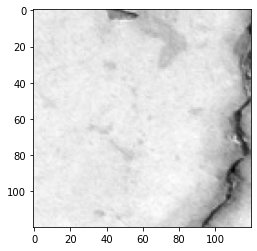

In [107]:
plt.imshow(X_test[101], cmap='gray')

### CNN Model 1

In [113]:
cnn1 = Sequential()
cnn1.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=X.shape[1:]))
cnn1.add(MaxPool2D())

cnn1.add(Conv2D(64, 3, padding="same", activation="relu"))
cnn1.add(MaxPool2D())

cnn1.add(Conv2D(128, 3, padding="same", activation="relu"))
cnn1.add(MaxPool2D())

cnn1.add(Flatten())
cnn1.add(Dense(256,activation="relu"))
cnn1.add(Dropout(0.5))
cnn1.add(BatchNormalization())
cnn1.add(Dense(2, activation="softmax"))

cnn1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 120, 120, 64)      640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 60, 60, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 128)     

In [130]:
datagen = ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1./255)

callback = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.05,
    patience=5,
    verbose=1,
    mode='auto',
    restore_best_weights=True)

In [127]:
cnn1.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])
cnn1_hist = []
epochs = [100, 125, 150, 175, 200, 250]
for epoch in epochs:
    history = cnn1.fit(datagen.flow(X, y, batch_size=16), epochs= epoch, batch_size= 32, validation_data=(X_val, y_val), callbacks=[callback], verbose=1)
    cnn1_hist.append(history)

Epoch 1/100
38/38 [==============================] - 11s 268ms/step - loss: 0.6939 - accuracy: 0.5167 - val_loss: 0.7658 - val_accuracy: 0.5000
Epoch 2/100
38/38 [==============================] - 10s 266ms/step - loss: 0.6939 - accuracy: 0.4883 - val_loss: 0.7913 - val_accuracy: 0.5000
Epoch 3/100
38/38 [==============================] - 10s 268ms/step - loss: 0.6930 - accuracy: 0.5150 - val_loss: 0.8227 - val_accuracy: 0.5000
Epoch 4/100
38/38 [==============================] - 11s 279ms/step - loss: 0.6943 - accuracy: 0.4917 - val_loss: 0.8484 - val_accuracy: 0.5000
Epoch 5/100
38/38 [==============================] - 10s 260ms/step - loss: 0.6942 - accuracy: 0.4983 - val_loss: 0.9134 - val_accuracy: 0.5000
Epoch 6/100
38/38 [==============================] - 10s 256ms/step - loss: 0.6944 - accuracy: 0.4667 - val_loss: 1.0021 - val_accuracy: 0.5000
Epoch 6: early stopping
Epoch 1/125
38/38 [==============================] - 10s 264ms/step - loss: 0.6932 - accuracy: 0.5250 - val_loss

In [128]:
for i in cnn1_hist:
    print(i.history['val_accuracy'])

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [86]:
y_pred = cnn1.predict(X_test)

In [90]:
predictions = []
for i in y_pred:
    predictions.append(np.argmax(i))

In [94]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average=None)

(array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([300, 300], dtype=int64))

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

